In [1011]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1012]:
df = pd.read_excel("study1.xlsx")

# OVERALL STUDY OF THE DATA

In [1013]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [1014]:
df.shape

(5000, 132)

In [1015]:
df.drop(columns = ["custid"]).duplicated().sum()

0

In [1016]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(31), int64(99), object(2)
memory usage: 5.0+ MB


# NULL VALUES

In [1017]:
pd.set_option('display.max_rows', 10000)
df.isnull().sum().sort_values(ascending = False)

lnwireten            3656
lnwiremon            3656
lnequipmon           3296
lnequipten           3296
lntollten            2622
lntollmon            2622
lncardten            1422
lncardmon            1419
lnlongten               3
longten                 3
townsize                2
commutetime             2
cardten                 2
lnothdebt               1
lncreddebt              1
commutebike             0
pets_freshfish          0
homeown                 0
pets_saltfish           0
pets_small              0
commutewalk             0
hometype                0
pets_reptiles           0
address                 0
commuterail             0
addresscat              0
commutebus              0
cars                    0
pets_birds              0
carown                  0
cartype                 0
carvalue                0
carcatvalue             0
carbought               0
carbuy                  0
commute                 0
commutecat              0
commutecar              0
commutemotor

#### We have null values in the following columns
1. townsize     - 2
2. lncreddebt   - 1
3. lnothdebt    - 1
4. commutetime  - 2
5. longten      - 3
6. lnlongten    - 3
7. lntollmon    - 2622
8. lntollten    - 2622
9. lnequipmon   - 3296
10. lnequipten  - 3296
11. lncardmon   - 1419
12. lncardten   - 1422
13. lnwiremon   - 3656
14. lnwireten   - 3656





## townsize - 2    [Size of hometown]

In [1018]:
df["townsize"].value_counts()

1.0    1436
2.0    1048
3.0     907
4.0     857
5.0     750
Name: townsize, dtype: int64

In [1019]:
df.drop(df[df["townsize"].isnull()].index, inplace=True)

In [1020]:
df.shape

(4998, 132)

## lncreddebt - 1 [Log-credit card debt]

In [1021]:
df.drop(df[df["lncreddebt"].isnull()].index, inplace=True)

In [1022]:
df.shape

(4997, 132)

## longten - 3 [Long distance over tenure]

In [1023]:
df.drop(df[df["longten"].isnull()].index, inplace=True)

In [1024]:
df.shape

(4994, 132)

## All the remaining numerical variables with null values

In [1025]:
df_i = df[["lntollmon", "lntollten", "lnequipmon", "lnequipten", "lncardmon", "lncardten", "lnwiremon", "lnwireten"]]

In [1026]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lntollmon   2376 non-null   float64
 1   lntollten   2376 non-null   float64
 2   lnequipmon  1702 non-null   float64
 3   lnequipten  1702 non-null   float64
 4   lncardmon   3577 non-null   float64
 5   lncardten   3576 non-null   float64
 6   lnwiremon   1343 non-null   float64
 7   lnwireten   1343 non-null   float64
dtypes: float64(8)
memory usage: 351.1 KB


#### we see that all these variables are numeric datatype so we can apply KNNImputer to fill them

In [1027]:
from sklearn.impute import KNNImputer

In [1028]:
imputer = KNNImputer(n_neighbors=5)

In [1029]:
df_i = pd.DataFrame(imputer.fit_transform(df_i), columns=df_i.columns)

In [1030]:
df_i.isnull().sum()

lntollmon     0
lntollten     0
lnequipmon    0
lnequipten    0
lncardmon     0
lncardten     0
lnwiremon     0
lnwireten     0
dtype: int64

In [1031]:
df.shape

(4994, 132)

In [1032]:
df_m = df.drop(columns = ["lntollmon", "lntollten", "lnequipmon", "lnequipten", "lncardmon", "lncardten",
                          "lnwiremon", "lnwireten"])

In [1033]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Columns: 124 entries, custid to response_03
dtypes: float64(23), int64(99), object(2)
memory usage: 4.8+ MB


In [1034]:
df_m.shape

(4994, 124)

In [1035]:
df_i.head()

,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten
0,3.367296,5.081715,3.384390,4.837075,2.656757,4.094345,3.253547,4.707539
1,3.183073,6.838770,4.004602,7.588324,2.772589,6.413459,3.821004,7.428660
2,2.944949,7.078572,3.687046,7.847041,3.135494,7.251345,3.678664,7.816380
3,3.184441,6.770874,3.595706,7.077136,3.044522,6.529419,3.650531,7.205653
4,2.803360,5.960232,3.491415,6.603927,2.847812,5.886104,2.947067,6.018106


In [1036]:
df_i.reset_index(inplace = True)
df_m.reset_index(inplace = True)


In [1037]:
df_i.drop(columns=["index"], inplace=True)
df_m.drop(columns=["index"],inplace=True)

In [1038]:
dff = pd.concat([df_m, df_i], axis = 1)

In [1039]:
dff.isnull().sum().sum()

0

In [1040]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Columns: 132 entries, custid to lnwireten
dtypes: float64(31), int64(99), object(2)
memory usage: 5.0+ MB


In [1041]:
dff.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,response_02,response_03,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,1,0,3.367296,5.081715,3.384390,4.837075,2.656757,4.094345,3.253547,4.707539
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,0,0,3.183073,6.838770,4.004602,7.588324,2.772589,6.413459,3.821004,7.428660
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,0,0,2.944949,7.078572,3.687046,7.847041,3.135494,7.251345,3.678664,7.816380
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,0,0,3.184441,6.770874,3.595706,7.077136,3.044522,6.529419,3.650531,7.205653
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,2.803360,5.960232,3.491415,6.603927,2.847812,5.886104,2.947067,6.018106


#### We now see that all the null values have been treated

In [1042]:
dff.isnull().sum().sum()

0

# USING MUTUAL INFORMATION IN REGRESSION FOR FEATURE SELECTION

#### Let us add cardspent and card2spent to get total spending on cards

In [1044]:
dff["total_cardspent"] = dff["cardspent"] + dff["card2spent"]

In [1045]:
dff[["total_cardspent", "cardspent", "card2spent"]].head()

,total_cardspent,cardspent,card2spent
0,149.46,81.66,67.80
1,77.54,42.60,34.94
2,359.97,184.22,175.75
3,359.41,340.99,18.42
4,507.83,255.10,252.73


In [1046]:
xc = dff.drop(columns = ["cardspent", "card2spent", "total_cardspent", "custid", "birthmonth"])
yc = dff["total_cardspent"]

In [1047]:
from sklearn.model_selection import train_test_split

In [1048]:
# Doing train, test split in order to avoid overfit

xtrainc, xtestc, ytrainc, ytestc = train_test_split(xc,yc, test_size=0.25, random_state=25)


In [1049]:
# train_test_split?

In [1050]:
from sklearn.feature_selection import mutual_info_regression

In [1051]:
mutual_info = mutual_info_regression(xtrainc, ytrainc,random_state=25)

In [1052]:
mutual_info_regression?

In [1053]:
mi = pd.Series(mutual_info)
mi.index = xtrainc.columns
Mi = pd.DataFrame(mi, columns=["Mutual Information"])
Mi.reset_index(inplace = True)
Mi = Mi.sort_values("Mutual Information", ascending = False)
Mi.rename(columns = {"index":"Features"}, inplace= True)
Mi

,Features,Mutual Information
75,carditems,0.192171
76,card2items,0.182697
12,income,0.090903
13,lninc,0.087352
14,inccat,0.086095
41,carvalue,0.077484
17,lncreddebt,0.070954
63,card,0.064534
42,carcatvalue,0.061247
16,creddebt,0.056638


In [1054]:
# Mi.to_csv("Mutual_info.csv")

In [1055]:
Mi_n = Mi[Mi["Mutual Information"]>=0.01]

In [1056]:
selected_features = Mi_n["Features"].tolist()

In [1057]:
selected_features

['carditems',
 'card2items',
 'income',
 'lninc',
 'inccat',
 'carvalue',
 'lncreddebt',
 'card',
 'carcatvalue',
 'creddebt',
 'lnothdebt',
 'othdebt',
 'age',
 'agecat',
 'addresscat',
 'card2',
 'employ',
 'card2benefit',
 'townsize',
 'longten',
 'retire',
 'empcat',
 'jobsat',
 'ownvcr',
 'lncardten',
 'card2tenure',
 'owncd',
 'owndvd',
 'multline',
 'tenure',
 'address',
 'longmon',
 'carown',
 'spousedcat',
 'lntollten',
 'card2tenurecat',
 'pets_dogs',
 'wireless',
 'reason',
 'ownfax',
 'gender',
 'internet',
 'forward',
 'vote',
 'bfast',
 'cardtenure',
 'news',
 'cardtenurecat']

In [1058]:
dfi = dff[selected_features]

In [1059]:
dfi.columns

Index(['carditems', 'card2items', 'income', 'lninc', 'inccat', 'carvalue',
       'lncreddebt', 'card', 'carcatvalue', 'creddebt', 'lnothdebt', 'othdebt',
       'age', 'agecat', 'addresscat', 'card2', 'employ', 'card2benefit',
       'townsize', 'longten', 'retire', 'empcat', 'jobsat', 'ownvcr',
       'lncardten', 'card2tenure', 'owncd', 'owndvd', 'multline', 'tenure',
       'address', 'longmon', 'carown', 'spousedcat', 'lntollten',
       'card2tenurecat', 'pets_dogs', 'wireless', 'reason', 'ownfax', 'gender',
       'internet', 'forward', 'vote', 'bfast', 'cardtenure', 'news',
       'cardtenurecat'],
      dtype='object')

In [1060]:
len(dfi.columns)

48

In [1061]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carditems       4994 non-null   int64  
 1   card2items      4994 non-null   int64  
 2   income          4994 non-null   int64  
 3   lninc           4994 non-null   float64
 4   inccat          4994 non-null   int64  
 5   carvalue        4994 non-null   float64
 6   lncreddebt      4994 non-null   float64
 7   card            4994 non-null   int64  
 8   carcatvalue     4994 non-null   int64  
 9   creddebt        4994 non-null   float64
 10  lnothdebt       4994 non-null   float64
 11  othdebt         4994 non-null   float64
 12  age             4994 non-null   int64  
 13  agecat          4994 non-null   int64  
 14  addresscat      4994 non-null   int64  
 15  card2           4994 non-null   int64  
 16  employ          4994 non-null   int64  
 17  card2benefit    4994 non-null   i

In [1062]:
dfi = pd.concat([dfi, dff[["cardspent", "card2spent", "total_cardspent", "birthmonth"]]], axis = 1)

In [1063]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carditems        4994 non-null   int64  
 1   card2items       4994 non-null   int64  
 2   income           4994 non-null   int64  
 3   lninc            4994 non-null   float64
 4   inccat           4994 non-null   int64  
 5   carvalue         4994 non-null   float64
 6   lncreddebt       4994 non-null   float64
 7   card             4994 non-null   int64  
 8   carcatvalue      4994 non-null   int64  
 9   creddebt         4994 non-null   float64
 10  lnothdebt        4994 non-null   float64
 11  othdebt          4994 non-null   float64
 12  age              4994 non-null   int64  
 13  agecat           4994 non-null   int64  
 14  addresscat       4994 non-null   int64  
 15  card2            4994 non-null   int64  
 16  employ           4994 non-null   int64  
 17  card2benefit  

# Variable Analysis - Univariate And Bivariate

## townsize

In [1064]:
pd.DataFrame(dfi.groupby(['townsize']).agg({"total_cardspent":['mean']}))


,total_cardspent
,mean
townsize,
1.0,499.508364
2.0,505.787471
3.0,491.622754
4.0,490.630035
5.0,500.961120


#### We see here that average card spending for every townsize is almost same , which gives us a picture that townsize does not indeed affect card spending. so we will drop townsize

In [1065]:
df.drop(columns = ["townsize"], inplace = True)

## gender

In [1066]:
dfi["gender"].value_counts()

1    2515
0    2479
Name: gender, dtype: int64

In [1067]:
pd.DataFrame(dfi.groupby(['gender']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
gender,
0,524.921932
1,471.652060


## age

In [1068]:
np.percentile(dfi["age"], range(1,101))

array([18., 18., 19., 20., 20., 21., 21., 22., 23., 23., 24., 24., 25.,
       25., 26., 26., 27., 28., 28., 29., 29., 30., 30., 31., 31., 32.,
       33., 33., 34., 34., 35., 35., 36., 36., 37., 37., 38., 39., 39.,
       40., 41., 42., 42., 43., 43., 44., 45., 45., 46., 47., 47., 48.,
       48., 49., 50., 50., 51., 52., 52., 53., 53., 54., 55., 55., 56.,
       56., 57., 58., 58., 59., 60., 60., 61., 62., 62., 63., 63., 64.,
       65., 65., 66., 67., 67., 68., 68., 69., 70., 70., 71., 72., 73.,
       74., 74., 75., 76., 77., 77., 78., 79., 79.])

In [1069]:
len(np.percentile(dfi["age"], range(1,101)))

100

Text(0, 0.5, 'total_cardspent')

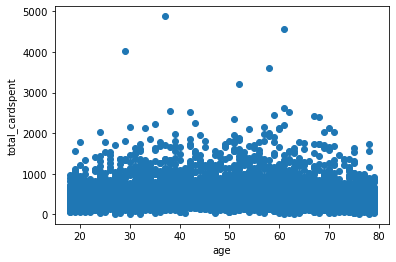

In [1070]:
plt.scatter(dff["age"], dfi["total_cardspent"])
plt.xlabel("age")
plt.ylabel("total_cardspent")

In [1071]:
# plt.hist?


Text(0, 0.5, 'total_cardspent')

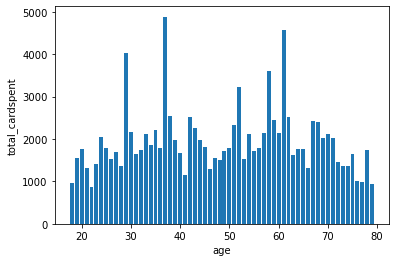

In [1072]:
plt.bar(dff["age"], dfi["total_cardspent"])
plt.xlabel("age")
plt.ylabel("total_cardspent")


#### age variable does not seem to have a clear impact on total_cardspent so we will drop it for now as we also have agecat


In [1073]:
dfi.drop(columns= ["age"], inplace=True)

## agecat

In [1074]:
dfi["agecat"].value_counts()

4    1220
5    1195
6    1067
3     893
2     619
Name: agecat, dtype: int64

In [1075]:
pd.DataFrame(dfi.groupby(['agecat']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
agecat,
2,410.266995
3,470.829552
4,531.990615
5,575.215858
6,446.737432


# birthmonth

#### we think that birthmonth would not affect overall credit card spending so we are dropping it for now


In [1076]:
dfi.drop(columns=['birthmonth'], inplace = True)

## employ and empcat -- [years with current employer]

#### We think when there is empcat there is no need of employ

In [1077]:
dfi.drop(columns= ["employ"], inplace= True)

In [1078]:
pd.DataFrame(dfi.groupby(['empcat']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
empcat,
1,433.734823
2,482.499771
3,509.394938
4,526.317560
5,547.404545


## retire

In [1079]:
dfi["retire"].value_counts()

0    4257
1     737
Name: retire, dtype: int64

In [1080]:
pd.DataFrame(dfi.groupby(['retire']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
retire,
0,521.649063
1,362.043881


# income, lninc, inccat

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

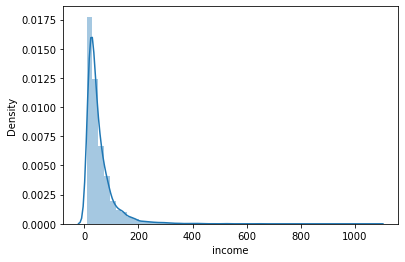

In [1081]:
sns.distplot(dfi["income"])

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lninc', ylabel='Density'>

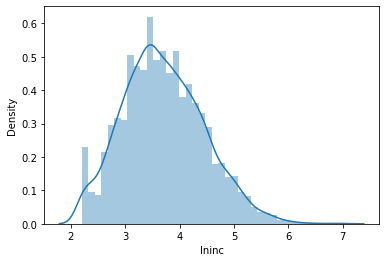

In [1082]:
sns.distplot(dfi["lninc"])

#### Since lninc is more close to normal distribution, we will remove income

In [1083]:
dfi.drop(columns = ["income"], inplace = True)

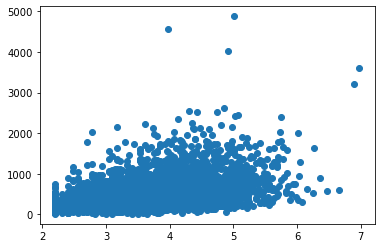

In [1084]:
plt.scatter(dfi["lninc"], dfi["total_cardspent"])

In [1085]:
pd.DataFrame(dfi.groupby(['inccat']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
inccat,
1,354.649751
2,453.133094
3,561.117986
4,649.103035
5,811.735770


#### We think that inccat is a good representation of household income so we can remove lninc as well

In [1086]:
dfi.drop(columns = ["lninc"], inplace = True)

## creddebt and lncreddebt

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='creddebt', ylabel='Density'>

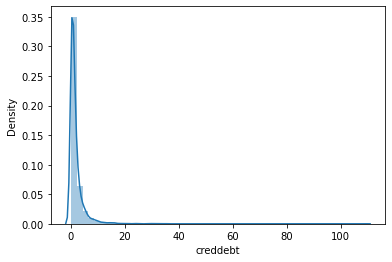

In [1087]:
sns.distplot(dfi["creddebt"])

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lncreddebt', ylabel='Density'>

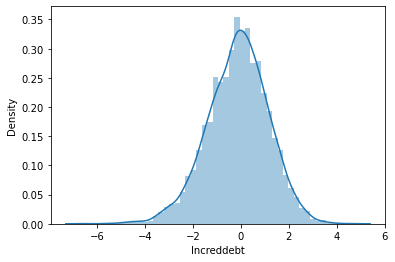

In [1088]:
sns.distplot(dfi["lncreddebt"])

#### We see that lncreddebt is more closer to the normal distribution so we will keep it and drop creddebt

In [1089]:
dfi.drop(columns = ["creddebt"], inplace=True)

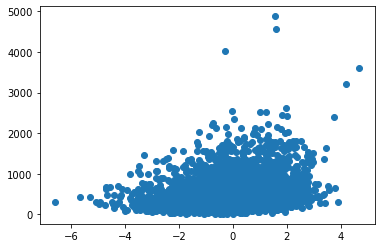

In [1090]:
plt.scatter(dfi["lncreddebt"], dfi["total_cardspent"])

In [1091]:
np.percentile(dfi["lncreddebt"], range(1,101))

array([-3.40192174, -2.98531046, -2.69305664, -2.46662814, -2.29164812,
       -2.15709282, -2.04439798, -1.92027135, -1.82733837, -1.73747018,
       -1.67262461, -1.6030055 , -1.5331512 , -1.47439855, -1.42290649,
       -1.36329684, -1.31718406, -1.26352073, -1.19920282, -1.14982773,
       -1.1087364 , -1.06545591, -1.01710898, -0.98453105, -0.95287178,
       -0.90608746, -0.86414259, -0.80950738, -0.77040382, -0.74115032,
       -0.70349396, -0.66201664, -0.62239062, -0.58055307, -0.53628738,
       -0.50514461, -0.47253729, -0.43336842, -0.39723189, -0.36241603,
       -0.32930952, -0.29954174, -0.27248722, -0.24614343, -0.22128216,
       -0.19782769, -0.16287965, -0.12892233, -0.10858997, -0.07602019,
       -0.04275768, -0.01518362,  0.01936152,  0.0475081 ,  0.07391887,
        0.09926467,  0.13278199,  0.16614032,  0.19493018,  0.2285408 ,
        0.26521846,  0.29565024,  0.31588445,  0.34307076,  0.37143522,
        0.40533703,  0.44363797,  0.47616458,  0.51106133,  0.54

In [1092]:
dfi["lncreddebt"][dfi["lncreddebt"]>= 2.65] = 2.65

<ipython-input-1092-3052131cd343>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["lncreddebt"][dfi["lncreddebt"]>= 2.65] = 2.65


In [1093]:
np.percentile(dfi["lncreddebt"], range(1,101))

array([-3.40192174, -2.98531046, -2.69305664, -2.46662814, -2.29164812,
       -2.15709282, -2.04439798, -1.92027135, -1.82733837, -1.73747018,
       -1.67262461, -1.6030055 , -1.5331512 , -1.47439855, -1.42290649,
       -1.36329684, -1.31718406, -1.26352073, -1.19920282, -1.14982773,
       -1.1087364 , -1.06545591, -1.01710898, -0.98453105, -0.95287178,
       -0.90608746, -0.86414259, -0.80950738, -0.77040382, -0.74115032,
       -0.70349396, -0.66201664, -0.62239062, -0.58055307, -0.53628738,
       -0.50514461, -0.47253729, -0.43336842, -0.39723189, -0.36241603,
       -0.32930952, -0.29954174, -0.27248722, -0.24614343, -0.22128216,
       -0.19782769, -0.16287965, -0.12892233, -0.10858997, -0.07602019,
       -0.04275768, -0.01518362,  0.01936152,  0.0475081 ,  0.07391887,
        0.09926467,  0.13278199,  0.16614032,  0.19493018,  0.2285408 ,
        0.26521846,  0.29565024,  0.31588445,  0.34307076,  0.37143522,
        0.40533703,  0.44363797,  0.47616458,  0.51106133,  0.54

## othdebt and lnothdebt

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='othdebt', ylabel='Density'>

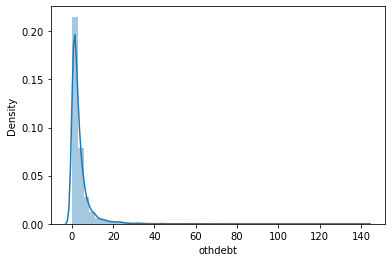

In [1094]:
sns.distplot(dfi["othdebt"])

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lnothdebt', ylabel='Density'>

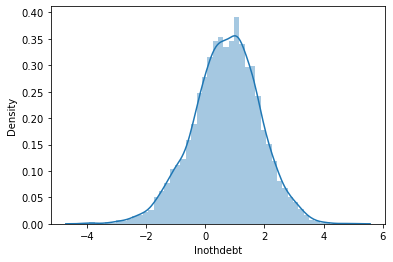

In [1095]:
sns.distplot(dfi["lnothdebt"])

#### We see that since lnothdebt is more closer to the normal distribution, we will keep it and drop othdebt

In [1096]:
dfi.drop(columns = ["othdebt"], inplace = True)

In [1097]:
np.percentile(dfi["lnothdebt"], range(1,101))

array([-2.16827067, -1.73936393, -1.53813577, -1.38372494, -1.24410825,
       -1.13590153, -1.0398837 , -0.94872727, -0.87086677, -0.77997062,
       -0.69298285, -0.62170098, -0.54498034, -0.4973891 , -0.43398916,
       -0.37135907, -0.32370705, -0.28496832, -0.24594174, -0.20370717,
       -0.15696022, -0.12056594, -0.0876684 , -0.04581807, -0.01943851,
        0.02844132,  0.06102448,  0.08919521,  0.11982542,  0.15659133,
        0.18972223,  0.22064568,  0.25107433,  0.27967028,  0.3058692 ,
        0.33248748,  0.36341489,  0.39500402,  0.42149072,  0.4529331 ,
        0.47776699,  0.5142218 ,  0.54272171,  0.56432273,  0.59109806,
        0.62106869,  0.65959292,  0.68324051,  0.71387546,  0.74124182,
        0.77403516,  0.80100572,  0.827534  ,  0.85149948,  0.88032081,
        0.91460694,  0.94664049,  0.97343465,  1.0055954 ,  1.02560334,
        1.04935775,  1.07550037,  1.10275594,  1.12502989,  1.15102274,
        1.18078063,  1.21102334,  1.24537698,  1.27318589,  1.29

In [1098]:
dfi['lnothdebt'][dfi["lnothdebt"]<= -1.73]= -1.73
dfi['lnothdebt'][dfi["lnothdebt"]>=3.18]= 3.18

<ipython-input-1098-487561bcefc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['lnothdebt'][dfi["lnothdebt"]<= -1.73]= -1.73
<ipython-input-1098-487561bcefc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['lnothdebt'][dfi["lnothdebt"]>=3.18]= 3.18


In [1099]:
np.percentile(dfi["lnothdebt"], range(1,101))

array([-1.73      , -1.73      , -1.53813577, -1.38372494, -1.24410825,
       -1.13590153, -1.0398837 , -0.94872727, -0.87086677, -0.77997062,
       -0.69298285, -0.62170098, -0.54498034, -0.4973891 , -0.43398916,
       -0.37135907, -0.32370705, -0.28496832, -0.24594174, -0.20370717,
       -0.15696022, -0.12056594, -0.0876684 , -0.04581807, -0.01943851,
        0.02844132,  0.06102448,  0.08919521,  0.11982542,  0.15659133,
        0.18972223,  0.22064568,  0.25107433,  0.27967028,  0.3058692 ,
        0.33248748,  0.36341489,  0.39500402,  0.42149072,  0.4529331 ,
        0.47776699,  0.5142218 ,  0.54272171,  0.56432273,  0.59109806,
        0.62106869,  0.65959292,  0.68324051,  0.71387546,  0.74124182,
        0.77403516,  0.80100572,  0.827534  ,  0.85149948,  0.88032081,
        0.91460694,  0.94664049,  0.97343465,  1.0055954 ,  1.02560334,
        1.04935775,  1.07550037,  1.10275594,  1.12502989,  1.15102274,
        1.18078063,  1.21102334,  1.24537698,  1.27318589,  1.29

## jobsat

In [1100]:
dfi["jobsat"].value_counts()

3    1083
2    1031
4    1016
1     972
5     892
Name: jobsat, dtype: int64

In [1101]:
pd.DataFrame(dff.groupby(['jobsat']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
jobsat,
1,460.692037
2,493.344035
3,479.272530
4,528.265650
5,532.831827


## spousedcat

In [1102]:
pd.DataFrame(dfi.groupby(['spousedcat']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
spousedcat,
-1,492.549792
1,467.811752
2,498.359873
3,517.901045
4,540.364340
5,553.451714


# pet_dogs

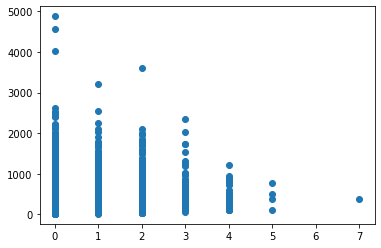

In [1103]:
plt.scatter(dfi["pets_dogs"], dff["total_cardspent"])

In [1104]:
pd.DataFrame(dfi.groupby(['pets_dogs']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
pets_dogs,
0,494.304293
1,492.300194
2,549.302702
3,523.102991
4,427.516944
5,438.727500
7,380.790000


# carditems and card2items

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carditems', ylabel='total_cardspent'>

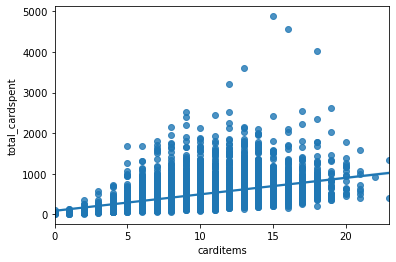

In [1105]:
sns.regplot(dfi["carditems"], dfi["total_cardspent"])

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='card2items', ylabel='total_cardspent'>

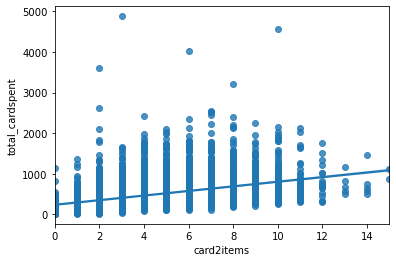

In [1106]:
sns.regplot(dfi["card2items"], dfi["total_cardspent"])

In [1107]:
np.percentile(dfi["carditems"], range(1,101))

array([ 2.  ,  4.  ,  4.  ,  5.  ,  5.  ,  5.  ,  5.  ,  6.  ,  6.  ,
        6.  ,  6.  ,  6.  ,  6.  ,  7.  ,  7.  ,  7.  ,  7.  ,  7.  ,
        7.  ,  7.  ,  7.  ,  8.  ,  8.  ,  8.  ,  8.  ,  8.  ,  8.  ,
        8.  ,  8.  ,  8.  ,  8.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
        9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  , 10.  , 10.  ,
       10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  ,
       10.15, 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  ,
       11.  , 11.  , 11.  , 11.  , 12.  , 12.  , 12.  , 12.  , 12.  ,
       12.  , 12.  , 12.  , 12.  , 13.  , 13.  , 13.  , 13.  , 13.  ,
       13.  , 13.  , 13.  , 14.  , 14.  , 14.  , 14.  , 14.  , 15.  ,
       15.  , 15.  , 15.  , 16.  , 16.  , 16.  , 17.  , 18.  , 19.  ,
       23.  ])

In [1108]:
dfi["carditems"][dfi["carditems"]>=19] = 19

<ipython-input-1108-85e712180bd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["carditems"][dfi["carditems"]>=19] = 19


In [1109]:
np.percentile(dfi["card2items"], range(1,101))

array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,
        8.,  8.,  9.,  9.,  9., 10., 10., 11., 15.])

In [1110]:
dfi["card2items"][dfi["card2items"]>=11] = 11

<ipython-input-1110-f559583e443f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["card2items"][dfi["card2items"]>=11] = 11


# carvalue - Primary vehicle sticker price

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carvalue', ylabel='Density'>

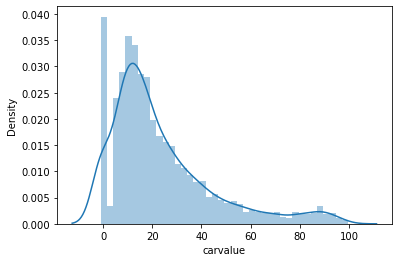

In [1111]:
sns.distplot(dfi["carvalue"])

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carvalue', ylabel='total_cardspent'>

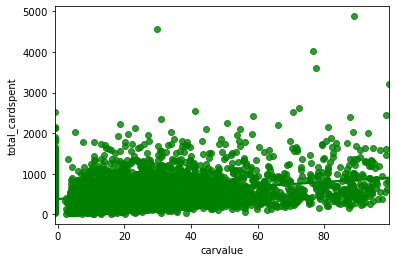

In [1112]:
sns.regplot(dfi["carvalue"], dfi["total_cardspent"], color = "green")

In [1113]:
# sns.regplot?

In [1114]:
np.percentile(dfi["carvalue"], range(1,101))

array([-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   ,  2.53 ,  4.2  ,  4.7  ,  5.109,  5.6  ,  5.9  ,  6.3  ,
        6.6  ,  7.   ,  7.4  ,  7.6  ,  8.053,  8.346,  8.7  ,  9.   ,
        9.3  ,  9.5  ,  9.8  , 10.   , 10.3  , 10.5  , 10.9  , 11.2  ,
       11.5  , 11.8  , 12.1  , 12.4  , 12.8  , 13.   , 13.327, 13.6  ,
       13.813, 14.2  , 14.5  , 14.9  , 15.3  , 15.6  , 16.   , 16.3  ,
       16.7  , 17.   , 17.4  , 17.736, 18.1  , 18.5  , 18.8  , 19.2  ,
       19.601, 20.   , 20.5  , 21.1  , 21.7  , 22.4  , 23.   , 23.6  ,
       24.1  , 24.638, 25.3  , 26.   , 26.6  , 27.31 , 28.   , 28.6  ,
       29.5  , 30.282, 31.1  , 31.968, 33.1  , 33.9  , 35.1  , 36.1  ,
       37.2  , 38.4  , 39.6  , 40.812, 42.405, 44.2  , 45.991, 48.   ,
       50.277, 52.9  , 55.763, 58.6  , 62.649, 67.6  , 71.935, 79.028,
       83.621, 88.114, 92.007, 99.6  ])

# carcatvalue

In [1115]:
dfi["carcatvalue"].value_counts()

 1    2395
 2    1267
 3     836
-1     496
Name: carcatvalue, dtype: int64

In [1116]:
pd.DataFrame(dfi.groupby(['carcatvalue']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
carcatvalue,
-1,517.296149
1,396.908747
2,541.279471
3,711.136328


# card and card2

In [1117]:
pd.DataFrame(dfi.groupby(['card']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
card,
1,753.906914
2,426.230981
3,426.112200
4,452.028019
5,433.551712


#### Here we can try to make 2,3 and 5 as one category but since it will taken as numeric variable there is no need to do so.

In [1118]:
pd.DataFrame(dfi.groupby(['card2']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
card2,
1,598.573088
2,457.902685
3,463.286213
4,538.281868
5,414.407645


# address and addresscat

#### Since we have addresscat we do not need address

In [1119]:
dfi.drop(columns = ["address"], inplace = True)

In [1120]:
dfi["addresscat"].value_counts()

3    1220
5    1156
4    1138
2     873
1     607
Name: addresscat, dtype: int64

In [1121]:
pd.DataFrame(dfi.groupby(['addresscat']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
addresscat,
1,411.991269
2,465.346987
3,510.236205
4,538.326995
5,515.618936


# tenure

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='total_cardspent'>

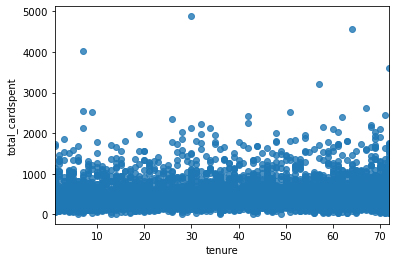

In [1122]:
sns.regplot(dfi["tenure"], dfi["total_cardspent"])

In [1123]:
np.percentile(dfi["tenure"], range(1,101))

array([ 1.,  2.,  2.,  3.,  4.,  5.,  5.,  6.,  6.,  7.,  7.,  8.,  9.,
        9., 10., 11., 11., 12., 13., 14., 14., 15., 16., 17., 18., 18.,
       19., 20., 21., 22., 23., 24., 25., 25., 26., 27., 28., 29., 29.,
       30., 31., 32., 32., 33., 34., 35., 36., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 44., 45., 46., 47., 48., 48., 49., 50., 52.,
       52., 53., 54., 54., 55., 56., 57., 58., 59., 59., 60., 61., 61.,
       62., 63., 64., 64., 65., 66., 66., 67., 68., 68., 69., 69., 70.,
       70., 71., 71., 72., 72., 72., 72., 72., 72.])

# card2benefit

In [1124]:
dfi["card2benefit"].value_counts()

4    1291
3    1284
2    1216
1    1203
Name: card2benefit, dtype: int64

In [1125]:
pd.DataFrame(dfi.groupby(['card2benefit']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
card2benefit,
1,502.588712
2,504.329737
3,484.950732
4,501.108040


## longten

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longten', ylabel='total_cardspent'>

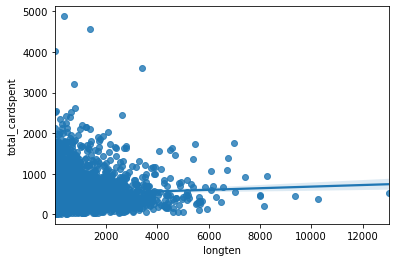

In [1126]:
sns.regplot(dfi["longten"], dfi["total_cardspent"])

In [1127]:
np.percentile(dfi["longten"], range(1,101))
     

array([2.4000000e+00, 4.2930000e+00, 6.5500000e+00, 9.3000000e+00,
       1.2597500e+01, 1.4929000e+01, 1.7901000e+01, 2.0872000e+01,
       2.4587000e+01, 2.8245000e+01, 3.0911500e+01, 3.4566000e+01,
       3.8359000e+01, 4.2051000e+01, 4.6535000e+01, 5.0032000e+01,
       5.4950000e+01, 5.8800000e+01, 6.5683500e+01, 7.0780000e+01,
       7.5926500e+01, 8.2500000e+01, 8.8019500e+01, 9.6766000e+01,
       1.0468750e+02, 1.1132700e+02, 1.1831650e+02, 1.2485400e+02,
       1.3174550e+02, 1.4019500e+02, 1.4933300e+02, 1.5796600e+02,
       1.6617250e+02, 1.7557400e+02, 1.8461500e+02, 1.9572000e+02,
       2.0395250e+02, 2.1500200e+02, 2.2624050e+02, 2.3480000e+02,
       2.4473250e+02, 2.5470900e+02, 2.6534900e+02, 2.7703400e+02,
       2.8602750e+02, 2.9912800e+02, 3.1230650e+02, 3.2447800e+02,
       3.3505600e+02, 3.5002500e+02, 3.6665000e+02, 3.8336600e+02,
       4.0002250e+02, 4.1994800e+02, 4.3886750e+02, 4.5296600e+02,
       4.6710200e+02, 4.8488500e+02, 5.0444350e+02, 5.2464000e

In [1128]:
dfi["longten"][dfi["longten"]>=4.6900905e+03] = 4.6900905e+03

<ipython-input-1128-28c8d5055b10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["longten"][dfi["longten"]>=4.6900905e+03] = 4.6900905e+03


In [1129]:
perc = np.percentile(dfi["longten"], range(1,101))
     
norm_perc = []
for i in perc:
    n = '{0:.4f}'.format(i) 
    norm_perc.append(n)
        
np.array(norm_perc)

array(['2.4000', '4.2930', '6.5500', '9.3000', '12.5975', '14.9290',
       '17.9010', '20.8720', '24.5870', '28.2450', '30.9115', '34.5660',
       '38.3590', '42.0510', '46.5350', '50.0320', '54.9500', '58.8000',
       '65.6835', '70.7800', '75.9265', '82.5000', '88.0195', '96.7660',
       '104.6875', '111.3270', '118.3165', '124.8540', '131.7455',
       '140.1950', '149.3330', '157.9660', '166.1725', '175.5740',
       '184.6150', '195.7200', '203.9525', '215.0020', '226.2405',
       '234.8000', '244.7325', '254.7090', '265.3490', '277.0340',
       '286.0275', '299.1280', '312.3065', '324.4780', '335.0560',
       '350.0250', '366.6500', '383.3660', '400.0225', '419.9480',
       '438.8675', '452.9660', '467.1020', '484.8850', '504.4435',
       '524.6400', '546.3055', '564.3410', '582.9770', '604.1760',
       '625.3125', '644.8450', '667.5705', '690.4380', '717.2090',
       '750.6700', '771.9135', '805.7420', '843.5905', '878.8820',
       '913.7375', '949.2860', '993.6330',

In [1130]:
np.percentile(dfi["longten"], range(1,101))

array([2.40000000e+00, 4.29300000e+00, 6.55000000e+00, 9.30000000e+00,
       1.25975000e+01, 1.49290000e+01, 1.79010000e+01, 2.08720000e+01,
       2.45870000e+01, 2.82450000e+01, 3.09115000e+01, 3.45660000e+01,
       3.83590000e+01, 4.20510000e+01, 4.65350000e+01, 5.00320000e+01,
       5.49500000e+01, 5.88000000e+01, 6.56835000e+01, 7.07800000e+01,
       7.59265000e+01, 8.25000000e+01, 8.80195000e+01, 9.67660000e+01,
       1.04687500e+02, 1.11327000e+02, 1.18316500e+02, 1.24854000e+02,
       1.31745500e+02, 1.40195000e+02, 1.49333000e+02, 1.57966000e+02,
       1.66172500e+02, 1.75574000e+02, 1.84615000e+02, 1.95720000e+02,
       2.03952500e+02, 2.15002000e+02, 2.26240500e+02, 2.34800000e+02,
       2.44732500e+02, 2.54709000e+02, 2.65349000e+02, 2.77034000e+02,
       2.86027500e+02, 2.99128000e+02, 3.12306500e+02, 3.24478000e+02,
       3.35056000e+02, 3.50025000e+02, 3.66650000e+02, 3.83366000e+02,
       4.00022500e+02, 4.19948000e+02, 4.38867500e+02, 4.52966000e+02,
      

# card2tenure and card2tenurecat

#### Since we have card2tenurecat we dont need card2tenure

In [1131]:
dfi.drop(columns = ["card2tenure"], inplace = True)

In [1132]:
pd.DataFrame(dfi.groupby(['card2tenurecat']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
card2tenurecat,
1,438.653536
2,459.753851
3,487.763015
4,526.540605
5,523.360255


# ownvcr

In [1133]:
dfi["ownvcr"].value_counts()

1    4573
0     421
Name: ownvcr, dtype: int64

In [1134]:
pd.DataFrame(dfi.groupby(['ownvcr']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
ownvcr,
0,349.464774
1,511.778205


# lncardten

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lncardten', ylabel='total_cardspent'>

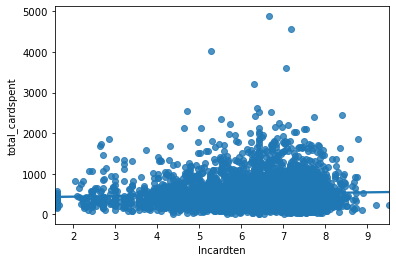

In [1135]:
sns.regplot(dfi["lncardten"], dfi["total_cardspent"])

In [1136]:
np.percentile(dfi["lncardten"], range(1,101))

array([2.45104509, 2.94987027, 3.4000142 , 3.7844724 , 4.00733319,
       4.17438727, 4.31748811, 4.51296299, 4.63378272, 4.74493213,
       4.86753445, 4.95058647, 5.04342512, 5.13579844, 5.19295685,
       5.27299956, 5.34478481, 5.39362755, 5.45958551, 5.52360459,
       5.57972983, 5.6347896 , 5.67122892, 5.72031178, 5.78382518,
       5.81471631, 5.85793315, 5.89989735, 5.93700337, 5.96614674,
       6.00388707, 6.04663553, 6.07739043, 6.13390399, 6.18315166,
       6.2146081 , 6.25382881, 6.28542956, 6.31896811, 6.3630281 ,
       6.38856141, 6.41345896, 6.42655901, 6.42655901, 6.42655901,
       6.42655901, 6.42655901, 6.42655901, 6.42655901, 6.42655901,
       6.42655901, 6.42655901, 6.42655901, 6.42655901, 6.42655901,
       6.42655901, 6.44571982, 6.48463524, 6.51471269, 6.54469856,
       6.57925121, 6.61338422, 6.65065288, 6.68458275, 6.70594042,
       6.72970039, 6.75846827, 6.79122146, 6.81892407, 6.84587988,
       6.8721281 , 6.91274282, 6.94215671, 6.96602419, 6.99393

In [1137]:
dfi["lncardten"][dfi["lncardten"]>=8.29]= 8.29

<ipython-input-1137-b36ec2325b9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["lncardten"][dfi["lncardten"]>=8.29]= 8.29


In [1138]:
np.percentile(dfi["lncardten"], range(1,101))

array([2.45104509, 2.94987027, 3.4000142 , 3.7844724 , 4.00733319,
       4.17438727, 4.31748811, 4.51296299, 4.63378272, 4.74493213,
       4.86753445, 4.95058647, 5.04342512, 5.13579844, 5.19295685,
       5.27299956, 5.34478481, 5.39362755, 5.45958551, 5.52360459,
       5.57972983, 5.6347896 , 5.67122892, 5.72031178, 5.78382518,
       5.81471631, 5.85793315, 5.89989735, 5.93700337, 5.96614674,
       6.00388707, 6.04663553, 6.07739043, 6.13390399, 6.18315166,
       6.2146081 , 6.25382881, 6.28542956, 6.31896811, 6.3630281 ,
       6.38856141, 6.41345896, 6.42655901, 6.42655901, 6.42655901,
       6.42655901, 6.42655901, 6.42655901, 6.42655901, 6.42655901,
       6.42655901, 6.42655901, 6.42655901, 6.42655901, 6.42655901,
       6.42655901, 6.44571982, 6.48463524, 6.51471269, 6.54469856,
       6.57925121, 6.61338422, 6.65065288, 6.68458275, 6.70594042,
       6.72970039, 6.75846827, 6.79122146, 6.81892407, 6.84587988,
       6.8721281 , 6.91274282, 6.94215671, 6.96602419, 6.99393

# owncd

In [1139]:
dfi["owncd"].value_counts()

1    4659
0     335
Name: owncd, dtype: int64

In [1140]:
pd.DataFrame(dfi.groupby(['owncd']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
owncd,
0,345.710687
1,509.052011


# owndvd

In [1141]:
dfi["owndvd"].value_counts()

1    4562
0     432
Name: owndvd, dtype: int64

In [1142]:
pd.DataFrame(dfi.groupby(['owndvd']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
owndvd,
0,347.249051
1,512.379397


# multline

In [1143]:
dfi["multline"].value_counts()

0    2555
1    2439
Name: multline, dtype: int64

In [1144]:
pd.DataFrame(dfi.groupby(['multline']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
multline,
0,480.791401
1,516.221554


# carown

In [1145]:
dfi["carown"].value_counts()

 1    3699
 0     799
-1     496
Name: carown, dtype: int64

In [1146]:
pd.DataFrame(dfi.groupby(['carown']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
carown,
-1,517.296149
0,389.405720
1,518.997659


# longmon

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longmon', ylabel='total_cardspent'>

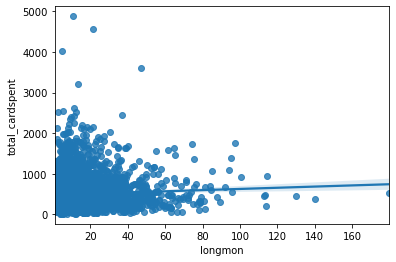

In [1147]:
sns.regplot(dfi["longmon"], dfi["total_cardspent"])

In [1148]:
np.percentile(dfi["longmon"], range(1,101))

array([  1.85  ,   2.2   ,   2.45  ,   2.686 ,   2.9   ,   3.05  ,
         3.25  ,   3.45  ,   3.6   ,   3.7   ,   3.9   ,   4.05  ,
         4.15  ,   4.25  ,   4.4   ,   4.55  ,   4.65  ,   4.8   ,
         4.95  ,   5.05  ,   5.2   ,   5.35  ,   5.45  ,   5.6   ,
         5.7125,   5.85  ,   6.0055,   6.15  ,   6.3   ,   6.445 ,
         6.55  ,   6.7   ,   6.85  ,   7.    ,   7.15  ,   7.3   ,
         7.45  ,   7.6   ,   7.75  ,   7.9   ,   8.    ,   8.2   ,
         8.35  ,   8.5   ,   8.65  ,   8.8   ,   8.95  ,   9.2   ,
         9.35  ,   9.55  ,   9.75  ,  10.    ,  10.25  ,  10.45  ,
        10.65  ,  10.85  ,  11.05  ,  11.25  ,  11.5435,  11.8   ,
        12.    ,  12.25  ,  12.55  ,  12.75  ,  13.05  ,  13.3   ,
        13.6   ,  13.95  ,  14.25  ,  14.55  ,  14.85  ,  15.25  ,
        15.7   ,  16.05  ,  16.55  ,  16.95  ,  17.45  ,  17.9   ,
        18.4   ,  19.    ,  19.633 ,  20.413 ,  21.05  ,  21.8   ,
        22.5025,  23.3   ,  24.05  ,  24.892 ,  25.8885,  26.9

In [1149]:
dfi["longmon"][dfi["longmon"]>= 65.2] = 65.2

<ipython-input-1149-e461454e9d87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["longmon"][dfi["longmon"]>= 65.2] = 65.2


In [1150]:
np.percentile(dfi["longmon"], range(1,101))

array([ 1.85  ,  2.2   ,  2.45  ,  2.686 ,  2.9   ,  3.05  ,  3.25  ,
        3.45  ,  3.6   ,  3.7   ,  3.9   ,  4.05  ,  4.15  ,  4.25  ,
        4.4   ,  4.55  ,  4.65  ,  4.8   ,  4.95  ,  5.05  ,  5.2   ,
        5.35  ,  5.45  ,  5.6   ,  5.7125,  5.85  ,  6.0055,  6.15  ,
        6.3   ,  6.445 ,  6.55  ,  6.7   ,  6.85  ,  7.    ,  7.15  ,
        7.3   ,  7.45  ,  7.6   ,  7.75  ,  7.9   ,  8.    ,  8.2   ,
        8.35  ,  8.5   ,  8.65  ,  8.8   ,  8.95  ,  9.2   ,  9.35  ,
        9.55  ,  9.75  , 10.    , 10.25  , 10.45  , 10.65  , 10.85  ,
       11.05  , 11.25  , 11.5435, 11.8   , 12.    , 12.25  , 12.55  ,
       12.75  , 13.05  , 13.3   , 13.6   , 13.95  , 14.25  , 14.55  ,
       14.85  , 15.25  , 15.7   , 16.05  , 16.55  , 16.95  , 17.45  ,
       17.9   , 18.4   , 19.    , 19.633 , 20.413 , 21.05  , 21.8   ,
       22.5025, 23.3   , 24.05  , 24.892 , 25.8885, 26.985 , 28.4315,
       30.028 , 31.949 , 34.35  , 36.8025, 40.17  , 45.442 , 52.257 ,
       65.2   , 65.2

## vote

In [1151]:
dfi["vote"].value_counts()

1    2588
0    2406
Name: vote, dtype: int64

In [1152]:
pd.DataFrame(dfi.groupby(['vote']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
vote,
0,473.602423
1,520.865135


## wireless

In [1153]:
dfi["wireless"].value_counts()

0    3651
1    1343
Name: wireless, dtype: int64

In [1154]:
pd.DataFrame(dfi.groupby(['wireless']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
wireless,
0,483.892673
1,536.704579


# reason

In [1155]:
dfi["reason"].value_counts()

9    4046
1     447
2     339
4     105
3      57
Name: reason, dtype: int64

In [1156]:
pd.DataFrame(dfi.groupby(['reason']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
reason,
1,418.903647
2,677.101711
3,392.458246
4,383.596286
9,496.305304


# cardtenure and cardtenurecat

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardtenure', ylabel='total_cardspent'>

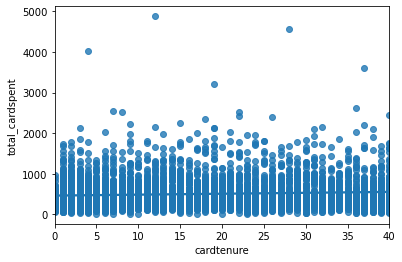

In [1157]:
sns.regplot(dfi["cardtenure"], dfi["total_cardspent"])

#### cardtenure does not seem to have an effect on total_cardspent so we will drop this

In [1158]:
np.percentile(dfi["cardtenure"], range(1,101))

array([ 0.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        3.,  3.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,
        7.,  7.,  7.,  7.,  8.,  8.,  8.,  9.,  9.,  9., 10., 10., 10.,
       11., 11., 11., 12., 12., 13., 13., 13., 14., 14., 14., 15., 15.,
       16., 16., 16., 17., 17., 18., 18., 18., 19., 19., 20., 21., 21.,
       22., 22., 23., 23., 24., 24., 25., 25., 26., 26., 27., 28., 28.,
       29., 29., 30., 30., 31., 32., 32., 33., 34., 34., 35., 35., 36.,
       37., 37., 38., 38., 39., 39., 40., 40., 40.])

In [1159]:
pd.DataFrame(dfi.groupby(['cardtenurecat']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
cardtenurecat,
1,427.127595
2,464.953463
3,466.752081
4,514.483055
5,525.238966


#### since we have cardtenurecat we dont need cardtenure

In [1160]:
dfi.drop(columns = ["cardtenure"], inplace = True)

# ownfax

In [1161]:
dfi["ownfax"].value_counts()

0    4102
1     892
Name: ownfax, dtype: int64

In [1162]:
pd.DataFrame(dfi.groupby(['ownfax']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
ownfax,
0,488.381431
1,542.764316


# forward

In [1163]:
dfi["forward"].value_counts()

0    2592
1    2402
Name: forward, dtype: int64

In [1164]:
pd.DataFrame(dfi.groupby(['forward']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
forward,
0,479.381856
1,518.288356


## news


In [1165]:
dfi.columns

Index(['carditems', 'card2items', 'inccat', 'carvalue', 'lncreddebt', 'card',
       'carcatvalue', 'lnothdebt', 'agecat', 'addresscat', 'card2',
       'card2benefit', 'townsize', 'longten', 'retire', 'empcat', 'jobsat',
       'ownvcr', 'lncardten', 'owncd', 'owndvd', 'multline', 'tenure',
       'longmon', 'carown', 'spousedcat', 'lntollten', 'card2tenurecat',
       'pets_dogs', 'wireless', 'reason', 'ownfax', 'gender', 'internet',
       'forward', 'vote', 'bfast', 'news', 'cardtenurecat', 'cardspent',
       'card2spent', 'total_cardspent'],
      dtype='object')

In [1166]:
dfi["news"].value_counts()

0    2632
1    2362
Name: news, dtype: int64

In [1167]:
pd.DataFrame(dfi.groupby(['news']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
news,
0,485.177724
1,512.488836


# internet

In [1168]:
dfi["internet"].value_counts()

0    2494
1     773
3     598
4     584
2     545
Name: internet, dtype: int64

In [1169]:
pd.DataFrame(dfi.groupby(['internet']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
internet,
0,480.380589
1,483.993001
2,492.320991
3,550.753562
4,543.878510


## lntollten

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lntollten', ylabel='total_cardspent'>

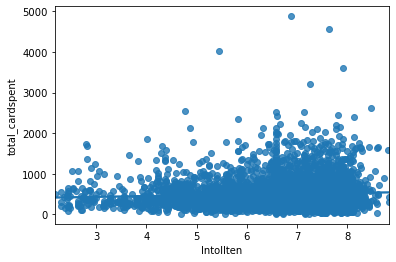

In [1170]:
sns.regplot(dfi["lntollten"], dfi["total_cardspent"])

#### lntollten does not seem to have much impact on total_cardspent so we will drop this

In [1171]:
np.percentile(dfi["lntollten"], range(1,101))

array([2.83217629, 3.53288226, 3.97464087, 4.22902113, 4.40452537,
       4.57397872, 4.71836537, 4.86597321, 5.00816941, 5.16429636,
       5.2525883 , 5.35720866, 5.43865079, 5.53616823, 5.61601567,
       5.68555712, 5.7618527 , 5.82626472, 5.8863373 , 5.96660903,
       6.0417169 , 6.10474843, 6.17188373, 6.22261142, 6.28224337,
       6.32907184, 6.39042073, 6.44748495, 6.49010423, 6.52829285,
       6.56798684, 6.58451953, 6.58451953, 6.58451953, 6.58451953,
       6.58451953, 6.58451953, 6.58451953, 6.58451953, 6.58451953,
       6.58451953, 6.58451953, 6.58451953, 6.58451953, 6.58451953,
       6.60774449, 6.6379936 , 6.67980482, 6.71292876, 6.74804702,
       6.77694755, 6.81580574, 6.84903327, 6.88008488, 6.93231863,
       6.96447015, 6.99289786, 7.02830904, 7.05861799, 7.09269622,
       7.12071849, 7.15042695, 7.17583523, 7.19962246, 7.22414846,
       7.24727563, 7.27338144, 7.29488289, 7.3149917 , 7.33816986,
       7.36416994, 7.38976529, 7.41486253, 7.43874464, 7.45827

In [1172]:
dfi["lntollten"][dfi["lntollten"]<= 3.97] = 3.97
dfi["lntollten"][dfi["lntollten"]>= 8.29] = 8.29

<ipython-input-1172-0bb819804147>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["lntollten"][dfi["lntollten"]<= 3.97] = 3.97
<ipython-input-1172-0bb819804147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["lntollten"][dfi["lntollten"]>= 8.29] = 8.29


In [1173]:
np.percentile(dfi["lntollten"], range(1,101))

array([3.97      , 3.97      , 3.97617049, 4.22902113, 4.40452537,
       4.57397872, 4.71836537, 4.86597321, 5.00816941, 5.16429636,
       5.2525883 , 5.35720866, 5.43865079, 5.53616823, 5.61601567,
       5.68555712, 5.7618527 , 5.82626472, 5.8863373 , 5.96660903,
       6.0417169 , 6.10474843, 6.17188373, 6.22261142, 6.28224337,
       6.32907184, 6.39042073, 6.44748495, 6.49010423, 6.52829285,
       6.56798684, 6.58451953, 6.58451953, 6.58451953, 6.58451953,
       6.58451953, 6.58451953, 6.58451953, 6.58451953, 6.58451953,
       6.58451953, 6.58451953, 6.58451953, 6.58451953, 6.58451953,
       6.60774449, 6.6379936 , 6.67980482, 6.71292876, 6.74804702,
       6.77694755, 6.81580574, 6.84903327, 6.88008488, 6.93231863,
       6.96447015, 6.99289786, 7.02830904, 7.05861799, 7.09269622,
       7.12071849, 7.15042695, 7.17583523, 7.19962246, 7.22414846,
       7.24727563, 7.27338144, 7.29488289, 7.3149917 , 7.33816986,
       7.36416994, 7.38976529, 7.41486253, 7.43874464, 7.45827

## bfast

In [1174]:
dfi["bfast"].value_counts()

3    1871
1    1581
2    1542
Name: bfast, dtype: int64

In [1175]:
pd.DataFrame(dfi.groupby(['bfast']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
bfast,
1,489.129760
2,489.813171
3,512.496173


## total_cardspent

In [1176]:
np.percentile(dfi["total_cardspent"], range(1,101))

array([  58.1832,   88.3202,  105.7895,  120.916 ,  133.082 ,  144.9174,
        153.9177,  161.4556,  172.5213,  183.931 ,  190.99  ,  196.9008,
        202.4463,  210.1134,  216.413 ,  222.5416,  228.27  ,  234.8958,
        241.1938,  247.328 ,  253.3112,  259.6892,  265.0346,  270.7068,
        276.325 ,  282.0008,  286.7088,  292.424 ,  297.71  ,  302.589 ,
        307.6828,  311.9932,  316.8697,  322.2924,  326.7785,  332.322 ,
        337.041 ,  342.8468,  348.5232,  354.6   ,  360.0626,  365.8844,
        372.8498,  378.3996,  385.112 ,  391.1456,  397.3236,  404.322 ,
        409.9556,  414.25  ,  422.7361,  428.45  ,  434.3676,  440.6042,
        446.2065,  452.3864,  458.8502,  465.6076,  472.0661,  479.138 ,
        486.7184,  492.48  ,  501.77  ,  509.072 ,  516.653 ,  524.8614,
        533.9044,  544.114 ,  552.3036,  562.423 ,  571.1   ,  582.6464,
        593.8981,  605.1628,  615.8675,  628.8288,  641.2576,  656.7268,
        671.1662,  686.74  ,  700.1665,  715.838 , 

In [1177]:
dfi["total_cardspent"][dfi["total_cardspent"]<= 88]= 88
dfi["total_cardspent"][dfi["total_cardspent"]>= 1760]= 1760

<ipython-input-1177-c9b22ce82b80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["total_cardspent"][dfi["total_cardspent"]<= 88]= 88
<ipython-input-1177-c9b22ce82b80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["total_cardspent"][dfi["total_cardspent"]>= 1760]= 1760


In [1178]:
np.percentile(dfi["total_cardspent"], range(1,101))

array([  88.    ,   88.3202,  105.7895,  120.916 ,  133.082 ,  144.9174,
        153.9177,  161.4556,  172.5213,  183.931 ,  190.99  ,  196.9008,
        202.4463,  210.1134,  216.413 ,  222.5416,  228.27  ,  234.8958,
        241.1938,  247.328 ,  253.3112,  259.6892,  265.0346,  270.7068,
        276.325 ,  282.0008,  286.7088,  292.424 ,  297.71  ,  302.589 ,
        307.6828,  311.9932,  316.8697,  322.2924,  326.7785,  332.322 ,
        337.041 ,  342.8468,  348.5232,  354.6   ,  360.0626,  365.8844,
        372.8498,  378.3996,  385.112 ,  391.1456,  397.3236,  404.322 ,
        409.9556,  414.25  ,  422.7361,  428.45  ,  434.3676,  440.6042,
        446.2065,  452.3864,  458.8502,  465.6076,  472.0661,  479.138 ,
        486.7184,  492.48  ,  501.77  ,  509.072 ,  516.653 ,  524.8614,
        533.9044,  544.114 ,  552.3036,  562.423 ,  571.1   ,  582.6464,
        593.8981,  605.1628,  615.8675,  628.8288,  641.2576,  656.7268,
        671.1662,  686.74  ,  700.1665,  715.838 , 

# CONVERTING NOMINAL CATEGORICAL VARIABLES TO OBJECT DATATYPE WITH THERE RESPECTIVE NAMES

# card

In [1179]:
dfi["card"].value_counts()

4    1343
2    1244
3    1200
1     985
5     222
Name: card, dtype: int64

In [1180]:
pd.DataFrame(dfi.groupby(['card']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
card,
1,737.956467
2,424.593328
3,426.274975
4,449.867029
5,430.832883


In [1181]:
dfi["card"] = dfi["card"].replace([2,3,5], "other")
dfi["card"] = dfi["card"].replace([1], "American Express")
dfi["card"] = dfi["card"].replace([4], "Discover")


In [1182]:
dfi["card"].value_counts()

other               2666
Discover            1343
American Express     985
Name: card, dtype: int64

## card2

In [1183]:
dfi["card2"].value_counts()

3    1381
2    1300
4    1140
1     829
5     344
Name: card2, dtype: int64

In [1184]:
pd.DataFrame(dfi.groupby(['card2']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
card2,
1,591.670676
2,457.596038
3,456.979464
4,532.771351
5,414.563052


In [1185]:
dfi["card2"] = dfi["card2"].replace([1], "American Express")
dfi["card2"] = dfi["card2"].replace([2], "Visa")
dfi["card2"] = dfi["card2"].replace([3], "Mastercard")
dfi["card2"] = dfi["card2"].replace([4], "Discover")
dfi["card2"] = dfi["card2"].replace([5], "other")

In [1186]:
dfi["card2"].value_counts()

Mastercard          1381
Visa                1300
Discover            1140
American Express     829
other                344
Name: card2, dtype: int64

## card2benefit

In [1187]:
dfi["card2benefit"].value_counts()

4    1291
3    1284
2    1216
1    1203
Name: card2benefit, dtype: int64

In [1188]:
pd.DataFrame(dfi.groupby(['card2benefit']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
card2benefit,
1,493.702943
2,501.173503
3,483.642726
4,497.349830


In [1189]:
dfi["card2benefit"] = dfi["card2benefit"].replace([1], "None")
dfi["card2benefit"] = dfi["card2benefit"].replace([2,4], "other")
dfi["card2benefit"] = dfi["card2benefit"].replace([3], "Airline miles")

In [1190]:
dfi["card2benefit"].value_counts()

other            2507
Airline miles    1284
None             1203
Name: card2benefit, dtype: int64

# retire

In [1191]:
pd.DataFrame(dfi.groupby(['retire']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
retire,
0,516.437437
1,363.573053


In [1192]:
dfi["retire"] = dfi["retire"].replace([0], "No")
dfi["retire"] = dfi["retire"].replace([1], "Yes")

In [1193]:
dfi["retire"].value_counts()

No     4257
Yes     737
Name: retire, dtype: int64

## ownvcr

In [1194]:
dfi["ownvcr"].value_counts()

1    4573
0     421
Name: ownvcr, dtype: int64

In [1195]:
pd.DataFrame(dfi.groupby(['ownvcr']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
ownvcr,
0,351.753872
1,506.962416


In [1196]:
dfi["ownvcr"] = dfi["ownvcr"].replace([0], "No")
dfi["ownvcr"] = dfi["ownvcr"].replace([1], "Yes")

In [1197]:
dfi["ownvcr"].value_counts()

Yes    4573
No      421
Name: ownvcr, dtype: int64

## owncd

In [1198]:
dfi["owncd"].value_counts()

1    4659
0     335
Name: owncd, dtype: int64

In [1199]:
pd.DataFrame(dfi.groupby(['owncd']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
owncd,
0,348.125104
1,504.358360


In [1200]:
dfi["owncd"] = dfi["owncd"].replace([0], "No")
dfi["owncd"] = dfi["owncd"].replace([1], "Yes")

In [1201]:
dfi["owncd"].value_counts()

Yes    4659
No      335
Name: owncd, dtype: int64

# owndvd


In [1202]:
dfi["owndvd"].value_counts()

1    4562
0     432
Name: owndvd, dtype: int64

In [1203]:
pd.DataFrame(dfi.groupby(['owndvd']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
owndvd,
0,349.018843
1,507.595653


In [1204]:
dfi["owndvd"] = dfi["owndvd"].replace([0], "No")
dfi["owndvd"] = dfi["owndvd"].replace([1], "Yes")

In [1205]:
dfi["owndvd"].value_counts()

Yes    4562
No      432
Name: owndvd, dtype: int64

## multline

In [1206]:
dfi["multline"].value_counts()

0    2555
1    2439
Name: multline, dtype: int64

In [1207]:
pd.DataFrame(dfi.groupby(['multline']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
multline,
0,478.301221
1,510.195937


In [1208]:
dfi["multline"] = dfi["multline"].replace([0], "No")
dfi["multline"] = dfi["multline"].replace([1], "Yes")

In [1209]:
dfi["multline"].value_counts()

No     2555
Yes    2439
Name: multline, dtype: int64

# carown

In [1210]:
dfi["carown"].value_counts()

 1    3699
 0     799
-1     496
Name: carown, dtype: int64

In [1211]:
pd.DataFrame(dfi.groupby(['carown']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
carown,
-1,513.249536
0,390.950288
1,513.513506


In [1212]:
dfi["carown"] = dfi["carown"].replace([-1], "NA")
dfi["carown"] = dfi["carown"].replace([0], "Lease")
dfi["carown"] = dfi["carown"].replace([1], "Own")

In [1213]:
dfi["carown"].value_counts()

Own      3699
Lease     799
NA        496
Name: carown, dtype: int64

# vote

In [1214]:
dfi["vote"].value_counts()

1    2588
0    2406
Name: vote, dtype: int64

In [1215]:
pd.DataFrame(dfi.groupby(['vote']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
vote,
0,472.735993
1,513.533505


In [1216]:
dfi["vote"] = dfi["vote"].replace([0], "No")
dfi["vote"] = dfi["vote"].replace([1], "Yes")

In [1217]:
dfi["vote"].value_counts()

Yes    2588
No     2406
Name: vote, dtype: int64

# wireless

In [1218]:
dfi["wireless"].value_counts()

0    3651
1    1343
Name: wireless, dtype: int64

In [1219]:
pd.DataFrame(dfi.groupby(['wireless']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
wireless,
0,480.677294
1,529.765235


In [1220]:
dfi["wireless"] = dfi["wireless"].replace([0], "No")
dfi["wireless"] = dfi["wireless"].replace([1], "Yes")

In [1221]:
dfi["wireless"].value_counts()

No     3651
Yes    1343
Name: wireless, dtype: int64

# reason

In [1222]:
dfi["reason"].value_counts()

9    4046
1     447
2     339
4     105
3      57
Name: reason, dtype: int64

In [1223]:
pd.DataFrame(dfi.groupby(['reason']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
reason,
1,418.884899
2,670.026785
3,393.102281
4,384.405619
9,491.665215


In [1224]:
dfi["reason"] = dfi["reason"].replace([1], "Prices")
dfi["reason"] = dfi["reason"].replace([2], "Convenience")
dfi["reason"] = dfi["reason"].replace([3], "Service")
dfi["reason"] = dfi["reason"].replace([4], "Other")
dfi["reason"] = dfi["reason"].replace([9], "No response")

In [1225]:
dfi["reason"].value_counts()

No response    4046
Prices          447
Convenience     339
Other           105
Service          57
Name: reason, dtype: int64

##  ownfax

In [1226]:
dfi["ownfax"].value_counts()

0    4102
1     892
Name: ownfax, dtype: int64

In [1227]:
pd.DataFrame(dfi.groupby(['ownfax']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
ownfax,
0,484.959388
1,534.892489


In [1228]:
dfi["ownfax"] = dfi["ownfax"].replace([0], "No")
dfi["ownfax"] = dfi["ownfax"].replace([1], "Yes")

In [1229]:
dfi["ownfax"].value_counts()

No     4102
Yes     892
Name: ownfax, dtype: int64

## gender

In [1230]:
dfi["gender"].value_counts()

1    2515
0    2479
Name: gender, dtype: int64

In [1231]:
pd.DataFrame(dfi.groupby(['gender']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
gender,
0,518.885127
1,469.229137


In [1232]:
dfi["gender"] = dfi["gender"].replace([0], "Male")
dfi["gender"] = dfi["gender"].replace([1], "Female")

In [1233]:
dfi["gender"].value_counts()

Female    2515
Male      2479
Name: gender, dtype: int64

## forward

In [1234]:
dfi["forward"].value_counts()

0    2592
1    2402
Name: forward, dtype: int64

In [1235]:
pd.DataFrame(dfi.groupby(['forward']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
forward,
0,476.356763
1,512.785504


In [1236]:
dfi["forward"] = dfi["forward"].replace([0], "No")
dfi["forward"] = dfi["forward"].replace([1], "Yes")

In [1237]:
dfi["forward"].value_counts()

No     2592
Yes    2402
Name: forward, dtype: int64

## news

In [1238]:
dfi["news"].value_counts()

0    2632
1    2362
Name: news, dtype: int64

In [1239]:
pd.DataFrame(dfi.groupby(['news']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
news,
0,480.923457
1,508.313704


In [1240]:
dfi["news"] = dfi["news"].replace([0], "No")
dfi["news"] = dfi["news"].replace([1], "Yes")

In [1241]:
dfi["news"].value_counts()

No     2632
Yes    2362
Name: news, dtype: int64

## internet 

In [1242]:
dfi["internet"].value_counts()

0    2494
1     773
3     598
4     584
2     545
Name: internet, dtype: int64

In [1243]:
pd.DataFrame(dfi.groupby(['internet']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
internet,
0,477.392598
1,483.405886
2,491.197761
3,539.050017
4,534.388579


In [1244]:
dfi["internet"]= dfi["internet"].replace([0], "None")
dfi["internet"]= dfi["internet"].replace([1], "Dial- up")
dfi["internet"]= dfi["internet"].replace([2], "DSL")
dfi["internet"]= dfi["internet"].replace([3], "Cabel modem")
dfi["internet"]= dfi["internet"].replace([4], "Other")

In [1245]:
dfi["internet"].value_counts()

None           2494
Dial- up        773
Cabel modem     598
Other           584
DSL             545
Name: internet, dtype: int64

## bfast

In [1246]:
dfi["bfast"].value_counts()

3    1871
1    1581
2    1542
Name: bfast, dtype: int64

In [1247]:
pd.DataFrame(dfi.groupby(['bfast']).agg({"total_cardspent":['mean']}))

,total_cardspent
,mean
bfast,
1,486.443498
2,484.766770
3,507.669685


In [1248]:
dfi["bfast"] = dfi["bfast"].replace([1,2], "Others")
dfi["bfast"] = dfi["bfast"].replace([3], "Cereal")

In [1249]:
dfi["bfast"].value_counts()

Others    3123
Cereal    1871
Name: bfast, dtype: int64

# MULTIVARIATE ANALYSIS

In [1250]:
corr1 = dfi.corr()

In [1251]:
corr1

,carditems,card2items,inccat,carvalue,lncreddebt,carcatvalue,lnothdebt,agecat,addresscat,townsize,...,tenure,longmon,spousedcat,lntollten,card2tenurecat,pets_dogs,cardtenurecat,cardspent,card2spent,total_cardspent
carditems,1.000000,0.096577,0.058581,0.031349,0.045638,0.024106,0.057913,-0.021172,0.003329,0.031483,...,0.009808,0.003501,0.011458,0.002548,0.004754,0.001786,0.009169,0.507218,0.092513,0.405579
card2items,0.096577,1.000000,0.069087,0.057397,0.058940,0.026462,0.054947,-0.006658,0.001615,0.015071,...,0.013337,0.017497,0.006396,0.014495,0.006321,-0.002048,0.004588,0.189957,0.655051,0.428871
inccat,0.058581,0.069087,1.000000,0.806856,0.549416,0.576261,0.640212,0.249208,0.340781,-0.007383,...,0.229329,0.162667,0.056611,0.212505,0.285193,0.011285,0.309257,0.354815,0.301874,0.383855
carvalue,0.031349,0.057397,0.806856,1.000000,0.460076,0.837116,0.542465,0.200355,0.275930,0.002294,...,0.201033,0.159424,0.040707,0.184697,0.236113,0.017503,0.244716,0.298482,0.260057,0.319081
lncreddebt,0.045638,0.058940,0.549416,0.460076,1.000000,0.320055,0.672966,0.134369,0.182710,-0.029411,...,0.117074,0.082246,0.013142,0.115511,0.155712,0.000800,0.171616,0.225115,0.199820,0.245055
carcatvalue,0.024106,0.026462,0.576261,0.837116,0.320055,1.000000,0.381918,0.160579,0.212251,0.001007,...,0.140810,0.108706,0.029298,0.125972,0.168852,0.012532,0.178512,0.201062,0.159167,0.210981
lnothdebt,0.057913,0.054947,0.640212,0.542465,0.672966,0.381918,1.000000,0.160869,0.232379,-0.003296,...,0.145542,0.096491,0.013847,0.145172,0.194387,0.004046,0.206677,0.245025,0.212039,0.268428
agecat,-0.021172,-0.006658,0.249208,0.200355,0.134369,0.160579,0.160869,1.000000,0.828783,-0.068675,...,0.596265,0.444835,0.000256,0.520597,0.668345,0.012850,0.687861,0.049851,0.037450,0.052245
addresscat,0.003329,0.001615,0.340781,0.275930,0.182710,0.212251,0.232379,0.828783,1.000000,-0.042906,...,0.630349,0.474100,0.050455,0.554859,0.688472,0.015838,0.700969,0.093891,0.070284,0.097498
townsize,0.031483,0.015071,-0.007383,0.002294,-0.029411,0.001007,-0.003296,-0.068675,-0.042906,1.000000,...,-0.029506,-0.017070,0.023416,-0.023413,-0.032216,0.031892,-0.033285,-0.006738,-0.002344,-0.009025


In [1252]:

corr1.to_excel("corr3.xlsx")

<AxesSubplot:>

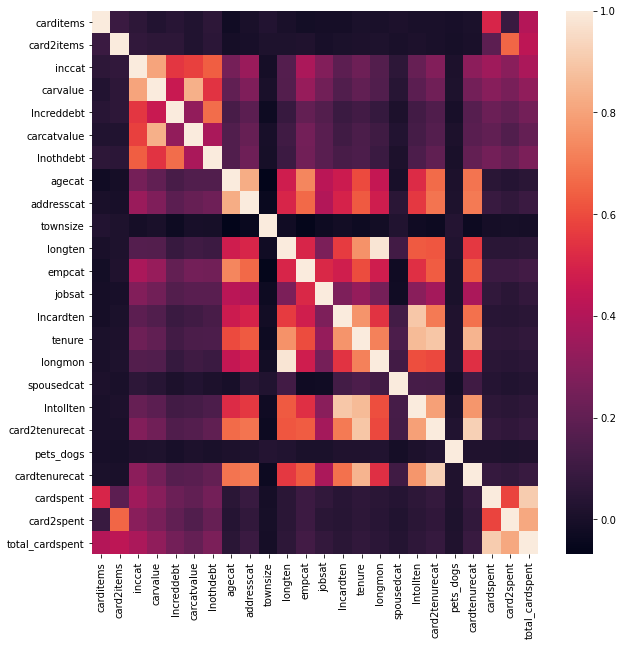

In [1253]:
plt.figure(figsize = (10,10))
sns.heatmap(corr1)

In [1254]:
# Dropping the autocorrelated variables
dfi.drop(columns = ["carvalue", "agecat", "longmon", "cardtenurecat", "longten", "lncardten", "lntollten", "tenure"], 
         inplace = True)

# CHECKING THE DISTRIBUTION OF TARGET VARIABLE

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cardspent', ylabel='Density'>

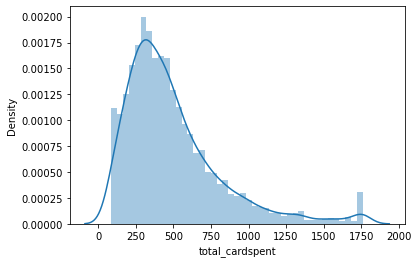

In [1255]:
sns.distplot(dfi["total_cardspent"])

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cardspent', ylabel='Density'>

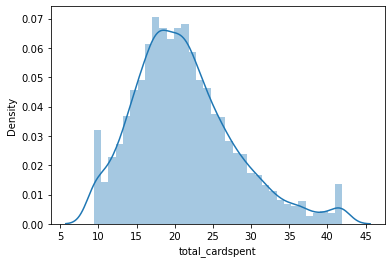

In [1256]:
sqrt_cardspent = np.sqrt(dfi["total_cardspent"])
sns.distplot(sqrt_cardspent)

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cardspent', ylabel='Density'>

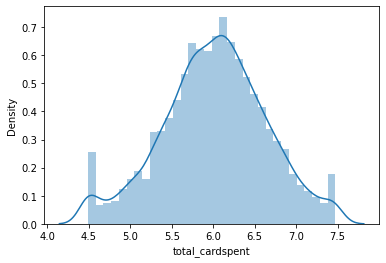

In [1257]:
log_cardspent = np.log1p(dfi["total_cardspent"])
sns.distplot(log_cardspent)

In [1258]:
dfi["log_TotalCardspent"] = log_cardspent

# FORMING THE DUMMY VARIABLES FOR THE NOMINAL CATEGORICAL VARIABLES

In [1259]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carditems           4994 non-null   int64  
 1   card2items          4994 non-null   int64  
 2   inccat              4994 non-null   int64  
 3   lncreddebt          4994 non-null   float64
 4   card                4994 non-null   object 
 5   carcatvalue         4994 non-null   int64  
 6   lnothdebt           4994 non-null   float64
 7   addresscat          4994 non-null   int64  
 8   card2               4994 non-null   object 
 9   card2benefit        4994 non-null   object 
 10  townsize            4994 non-null   float64
 11  retire              4994 non-null   object 
 12  empcat              4994 non-null   int64  
 13  jobsat              4994 non-null   int64  
 14  ownvcr              4994 non-null   object 
 15  owncd               4994 non-null   object 
 16  owndvd

In [1260]:
df_d = dfi.select_dtypes(include = "object")

In [1261]:
df_d.columns

Index(['card', 'card2', 'card2benefit', 'retire', 'ownvcr', 'owncd', 'owndvd',
       'multline', 'carown', 'wireless', 'reason', 'ownfax', 'gender',
       'internet', 'forward', 'vote', 'bfast', 'news'],
      dtype='object')

In [1262]:
df_d = pd.get_dummies(df_d, drop_first=True)

In [1263]:
df_d.head()

,card_Discover,card_other,card2_Discover,card2_Mastercard,card2_Visa,card2_other,card2benefit_None,card2benefit_other,retire_Yes,ownvcr_Yes,...,ownfax_Yes,gender_Male,internet_DSL,internet_Dial- up,internet_None,internet_Other,forward_Yes,vote_Yes,bfast_Others,news_Yes
0,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
1,0,1,1,0,0,0,0,0,0,1,...,1,1,0,0,0,1,1,0,1,1
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,0,1,0,1,...,0,1,1,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


# SCALING THE NUMERIC DATATYPE VARIABLES

In [1264]:
df_s = dfi.drop(columns = dfi.select_dtypes(include = "object").columns)

In [1265]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carditems           4994 non-null   int64  
 1   card2items          4994 non-null   int64  
 2   inccat              4994 non-null   int64  
 3   lncreddebt          4994 non-null   float64
 4   carcatvalue         4994 non-null   int64  
 5   lnothdebt           4994 non-null   float64
 6   addresscat          4994 non-null   int64  
 7   townsize            4994 non-null   float64
 8   empcat              4994 non-null   int64  
 9   jobsat              4994 non-null   int64  
 10  spousedcat          4994 non-null   int64  
 11  card2tenurecat      4994 non-null   int64  
 12  pets_dogs           4994 non-null   int64  
 13  cardspent           4994 non-null   float64
 14  card2spent          4994 non-null   float64
 15  total_cardspent     4994 non-null   float64
 16  log_To

In [1266]:
from sklearn.preprocessing import MinMaxScaler

In [1267]:
scaler = MinMaxScaler()

In [1268]:
names = df_s.columns

In [1269]:
d = scaler.fit_transform(df_s)

In [1270]:
df_sc = pd.DataFrame(d, columns=names)

In [1271]:
df_sc.head()

,carditems,card2items,inccat,lncreddebt,carcatvalue,lnothdebt,addresscat,townsize,empcat,jobsat,spousedcat,card2tenurecat,pets_dogs,cardspent,card2spent,total_cardspent,log_TotalCardspent
0,0.263158,0.363636,0.25,0.733229,0.5,0.516602,0.00,0.25,0.0,0.00,0.000000,0.25,0.000000,0.020798,0.032765,0.036758,0.175900
1,0.263158,0.181818,0.00,0.735113,0.5,0.443949,0.00,1.00,0.0,0.00,0.000000,0.25,0.000000,0.010850,0.016885,0.000000,0.000000
2,0.473684,0.636364,0.25,0.705423,0.5,0.541902,1.00,0.75,1.0,0.75,0.500000,1.00,0.142857,0.046918,0.084934,0.162661,0.469065
3,0.894737,0.090909,0.00,0.304557,0.5,0.374914,0.25,0.50,0.0,0.25,0.833333,0.25,0.000000,0.086845,0.008902,0.162327,0.468545
4,0.421053,0.636364,0.00,0.547037,0.5,0.000000,0.25,0.25,0.0,0.00,0.500000,0.50,0.000000,0.064970,0.122136,0.251094,0.584079


# CONCATENATING THE DATAFRAMES TO FORM A SINGLE DATAFRAME FOR ANALYSIS

In [1272]:
df_sc.head()

,carditems,card2items,inccat,lncreddebt,carcatvalue,lnothdebt,addresscat,townsize,empcat,jobsat,spousedcat,card2tenurecat,pets_dogs,cardspent,card2spent,total_cardspent,log_TotalCardspent
0,0.263158,0.363636,0.25,0.733229,0.5,0.516602,0.00,0.25,0.0,0.00,0.000000,0.25,0.000000,0.020798,0.032765,0.036758,0.175900
1,0.263158,0.181818,0.00,0.735113,0.5,0.443949,0.00,1.00,0.0,0.00,0.000000,0.25,0.000000,0.010850,0.016885,0.000000,0.000000
2,0.473684,0.636364,0.25,0.705423,0.5,0.541902,1.00,0.75,1.0,0.75,0.500000,1.00,0.142857,0.046918,0.084934,0.162661,0.469065
3,0.894737,0.090909,0.00,0.304557,0.5,0.374914,0.25,0.50,0.0,0.25,0.833333,0.25,0.000000,0.086845,0.008902,0.162327,0.468545
4,0.421053,0.636364,0.00,0.547037,0.5,0.000000,0.25,0.25,0.0,0.00,0.500000,0.50,0.000000,0.064970,0.122136,0.251094,0.584079


In [1273]:
df_f = pd.concat([df_sc, df_d], axis = 1)

In [1274]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carditems           4994 non-null   float64
 1   card2items          4994 non-null   float64
 2   inccat              4994 non-null   float64
 3   lncreddebt          4994 non-null   float64
 4   carcatvalue         4994 non-null   float64
 5   lnothdebt           4994 non-null   float64
 6   addresscat          4994 non-null   float64
 7   townsize            4994 non-null   float64
 8   empcat              4994 non-null   float64
 9   jobsat              4994 non-null   float64
 10  spousedcat          4994 non-null   float64
 11  card2tenurecat      4994 non-null   float64
 12  pets_dogs           4994 non-null   float64
 13  cardspent           4994 non-null   float64
 14  card2spent          4994 non-null   float64
 15  total_cardspent     4994 non-null   float64
 16  log_To

# MODEL CREATION

In [1275]:
x = df_f.drop(columns = [
    "cardspent",
    "card2spent",
    "total_cardspent",
    "log_TotalCardspent",
    
    "carcatvalue",
    "lncreddebt",
    "owncd_Yes",
    "ownvcr_Yes",
    "card2tenurecat",
    "owndvd_Yes",
   "reason_No response",

    
    
 ])

In [1276]:
y = df_f["log_TotalCardspent"]

In [1277]:
from sklearn.model_selection import train_test_split

In [1278]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=25)

In [1279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif["features"] = xtrain.columns
vif.sort_values('vif_value', ascending=False)

,vif_value,features
3,9.685691,lnothdebt
0,8.937898,carditems
4,8.137495,addresscat
6,7.513068,empcat
2,6.120075,inccat
21,6.114456,carown_Own
30,5.394413,internet_None
1,4.376919,card2items
7,4.130810,jobsat
11,3.761151,card_other


In [1280]:
from xgboost import XGBRegressor

In [1281]:
xgbr = XGBRegressor(objective='reg:squarederror')

In [1282]:
XGBRegressor?

In [1283]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [1284]:
'''
params = {"n_estimators": np.arange(50, 400, 50),
         "max_depth": np.arange(2,20,2),
         "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
         "gamma": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.25, 1.50],
         "min_child_weight":np.arange(2,20,2),
         "subsample":[0.25, 0.5, 0.75, 0.6, 0.7, 0.8, 0.9],
         "colsample_bytree":[0.25, 0.5, 0.75, 0.6, 0.7, 0.8, 0.9]}

xgbr_rs = RandomizedSearchCV(xgbr, param_distributions=params, n_iter=20, n_jobs=-1, cv = 10, verbose = True, random_state=25)
xgbr_rs.fit(xtrain, ytrain)

----------------------------------------------------------------------------------------------
# xgbr_rs.best_params_

{'subsample': 0.6,
 'n_estimators': 200,
 'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.75}
 
 ''';

In [1285]:
'''
params = {"n_estimators": np.arange(50, 400, 50),
         "max_depth": np.arange(2,20,2),
         "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
         "gamma": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.25, 1.50],
          "reg_lambda":[1,2,3,4,5,1.25, 1.50],
         "min_child_weight":np.arange(2,20,2),
         "subsample":[0.25, 0.5, 0.75, 0.6, 0.7, 0.8, 0.9],
         "colsample_bytree":[0.25, 0.5, 0.75, 0.6, 0.7, 0.8, 0.9]}

xgbr_rs = RandomizedSearchCV(xgbr, param_distributions=params,n_iter=60, n_jobs=-1, cv = 10, verbose = True,random_state=25 )
xgbr_rs.fit(xtrain, ytrain)

-----------------------------------------------------------------------------------------
xgbr_new =  XGBRegressor(subsample = 0.5, n_estimators = 300, min_child_weight = 16, max_depth = 12, learning_rate = 0.1, 
                        reg_lambda = 1.25, gamma = 0.2, colsample_bytree = 0.75)
                        
''';

In [1286]:
'''
# THIS IS THE ONE WE HAVE USED

params1 = {"n_estimators": np.arange(50, 400, 50),
         "max_depth": np.arange(2,20,2),
         "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
         "gamma": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.25, 1.50],
          "reg_lambda":[1,2,3,4,5,1.25, 1.50],
         "reg_alpha":[1,2,3,4,5,1.25, 1.50],
         "min_child_weight":np.arange(2,20,2),
         "subsample":[0.25, 0.5, 0.75, 0.6, 0.7, 0.8, 0.9],
         "colsample_bytree":[0.25, 0.5, 0.75, 0.6, 0.7, 0.8, 0.9]}

xgbr_rs1 = RandomizedSearchCV(xgbr, param_distributions=params1,n_iter=60, n_jobs=-1, cv = 10, verbose = True,random_state=25 )
xgbr_rs1.fit(xtrain, ytrain)

-----------------------------------------------------------------------------------------------





''';

In [1287]:
xgbr_new1 =  XGBRegressor(subsample = 0.5, n_estimators = 200, min_child_weight = 6, max_depth = 12, learning_rate = 0.2, 
                        reg_lambda = 2,reg_alpha= 1.25, gamma = 0.1, colsample_bytree = 0.75)

In [1288]:
xgbr_new1.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=12,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1.25, reg_lambda=2, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1289]:
xgbr_new1.score(xtrain, ytrain)

0.7041745072379303

In [1290]:
y_train_pred = np.expm1(xgbr_new1.predict(xtrain))
ytrain_anti = np.expm1(ytrain)

In [1291]:
SS_Residual = sum((ytrain_anti-y_train_pred)**2)
SS_Total = sum((ytrain_anti-np.mean(ytrain_anti))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytrain_anti)-1)/(len(ytrain_anti)-xtrain.shape[1]-1)
print ("R Squared", r_squared,"\n", "Adjusted R Squared", adjusted_r_squared)

R Squared 0.6657063230480516 
 Adjusted R Squared 0.6624607533689064


In [1292]:
from sklearn import metrics

In [1293]:
print('Mean Absolute Error :', metrics.mean_absolute_error(ytrain_anti, y_train_pred))  
print('Mean Squared Error :', metrics.mean_squared_error(ytrain_anti, y_train_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(ytrain_anti, y_train_pred)))

Mean Absolute Error : 0.1565620408248255
Mean Squared Error : 0.04254552331351023
Root Mean Squared Error : 0.20626566198354546


# FOR TEST DATA

In [1294]:
xgbr_new1.score(xtest, ytest)

0.6669451184202754

In [1295]:
y_test_pred = np.expm1(xgbr_new1.predict(xtest))
ytest_anti = np.expm1(ytest)

In [1296]:
SS_Residual = sum((ytest_anti-y_test_pred)**2)
SS_Total = sum((ytest_anti-np.mean(ytest_anti))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_anti)-1)/(len(ytest_anti)-xtest.shape[1]-1)
print ("R Squared", r_squared,"\n", "Adjusted R Squared", adjusted_r_squared)

R Squared 0.6240998839689557 
 Adjusted R Squared 0.6129345339878356


In [1297]:
print('Mean Absolute Error :', metrics.mean_absolute_error(ytest_anti, y_test_pred))  
print('Mean Squared Error :', metrics.mean_squared_error(ytest_anti, y_test_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(ytest_anti, y_test_pred)))

Mean Absolute Error : 0.16615920157001904
Mean Squared Error : 0.047152974991519214
Root Mean Squared Error : 0.2171473577815747
